In [49]:
import os

os.chdir("..")

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from spa.core import spa
from spa.properties import ThresholdProperty, RatioHyperproperty


In [52]:
all_data = pd.read_csv('data/Property4/Property4.csv')

# Parse the data from success rate into a list of floats
def convert_to_float_list(data):
    return [float(x) for x in data.split(";")]

all_data['success_rate'] = all_data['success_rate'].apply(convert_to_float_list)

# Seperate by associativity
way_8 = all_data.loc[all_data['associativity'] == 8]
way_4 = all_data.loc[all_data['associativity'] == 4]
way_2 = all_data.loc[all_data['associativity'] == 2]

In [144]:
obj1 = way_4
obj2 = way_2
proportion = 0.5
conf = 0.95

intervals = []

for index, row in obj1.iterrows():
    noise_level = row['noise_level']
    success_rate = row['success_rate']
    other_success_rate = obj2.loc[obj2['noise_level'] == noise_level]['success_rate'].values[0]
    difference_data = [a - b for a, b in zip(success_rate, other_success_rate)]
    result = spa(difference_data, ThresholdProperty(op=">"), proportion, conf, granularity=0.01)
    intervals.append(result.confidence_interval)
    


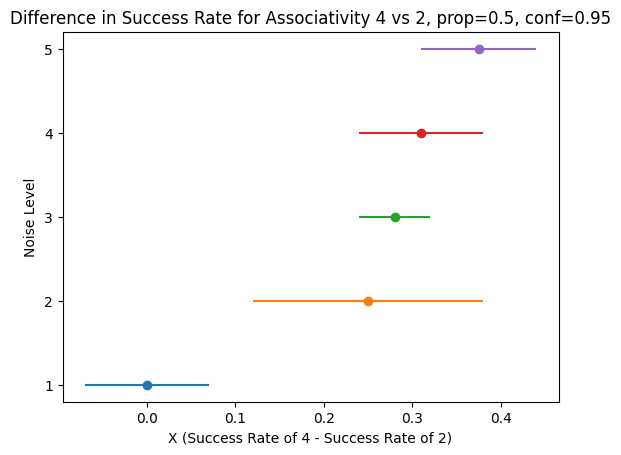

In [145]:
noise_levels = [1,2,3,4,5]
obj1 = 4
obj2 = 2

plt.title(f"Difference in Success Rate for Associativity {obj1} vs {obj2}, prop={proportion}, conf={conf}")
plt.xlabel(f"X (Success Rate of {obj1} - Success Rate of {obj2})")
plt.ylabel("Noise Level")
plt.yticks(noise_levels)
for i, noise_level in enumerate(noise_levels):
    low = intervals[i].low
    high = intervals[i].high

    plt.errorbar((low + high) / 2, noise_level, xerr=(high - low) / 2, fmt='o')

plt.savefig(f"figures/associativity({obj1},{obj2})_p{proportion}c{conf}.png")